<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/Total_Electricty_consumption_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving T-test.xlsx to T-test.xlsx


In [6]:
#Name of uploaded file
file_name = 'T-test.xlsx'

#Read data from the two sheets
sheet1_df = pd.read_excel(file_name, sheet_name='Total ')

In [8]:
df = sheet1_df
df

,Year,Total Electricity Consumption
0,2005,61327
1,2006,67603
2,2007,72712
3,2008,73400
4,2009,70371
5,2010,74348
6,2011,77099
7,2012,76761
8,2013,76789
9,2014,83409


In [10]:
# Split the data into pre- and post-2015 groups
pre_2015 = df[df['Year'] < 2015]['Total Electricity Consumption ']
post_2015 = df[df['Year'] >= 2015]['Total Electricity Consumption ']


In [11]:
# Check the sample sizes
print(f"Pre-2015 Data Points: {len(pre_2015)}")
print(f"Post-2015 Data Points: {len(post_2015)}")

Pre-2015 Data Points: 10
Post-2015 Data Points: 10


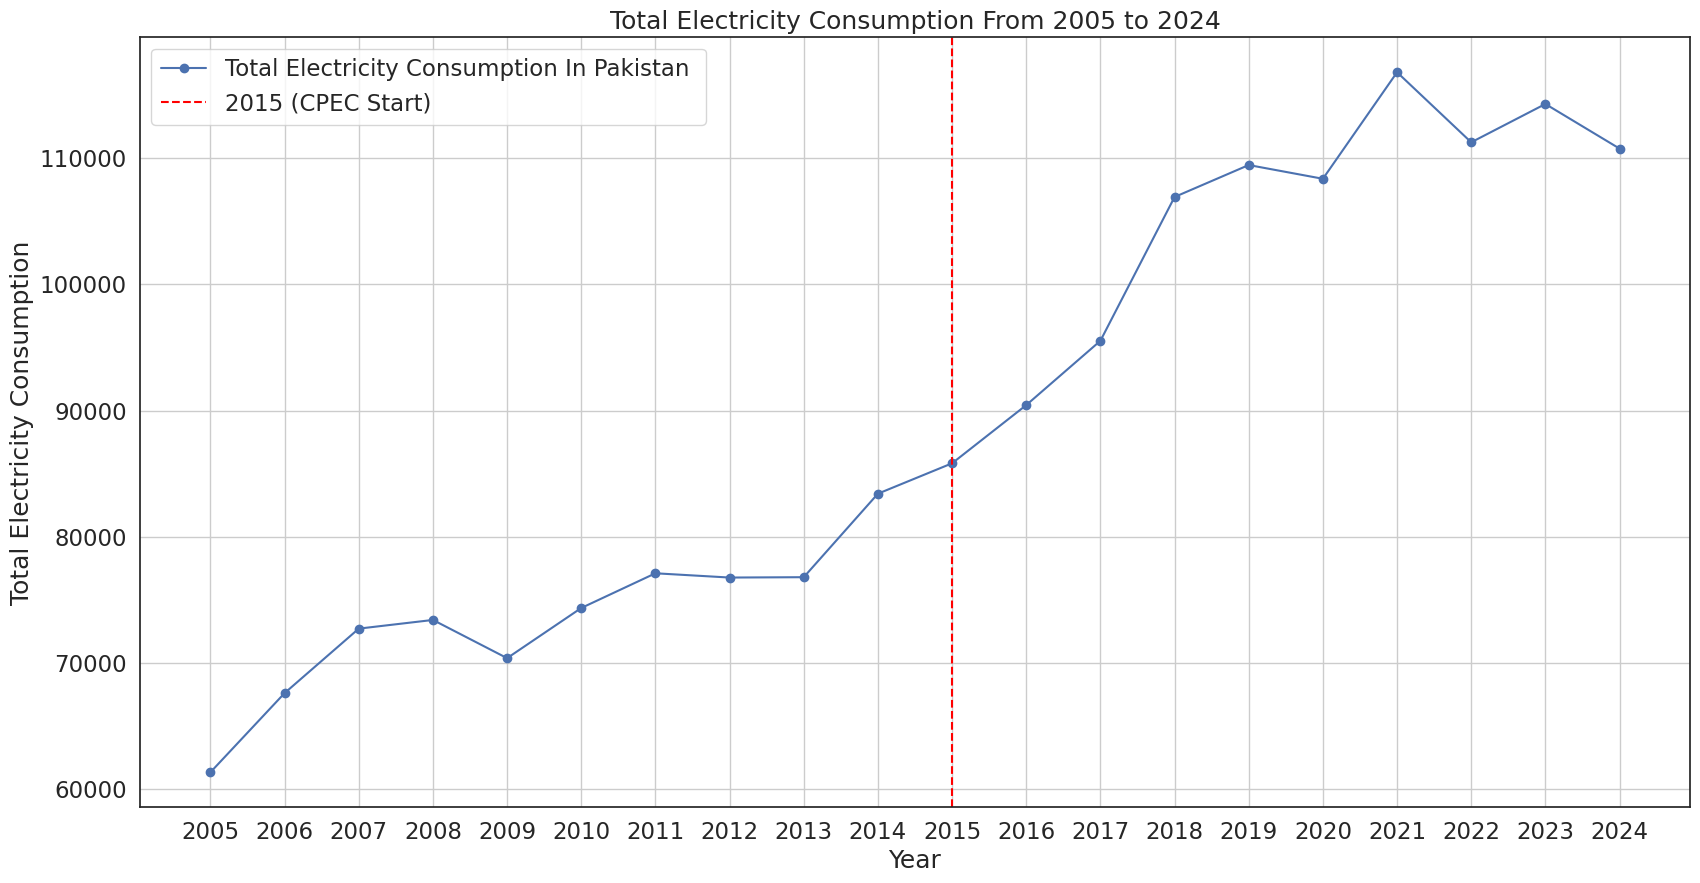

In [18]:
# Plot the data for visualization
plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['Total Electricity Consumption '], marker='o', label='Total Electricity Consumption In Pakistan ')
plt.axvline(x=2015, color='red', linestyle='--', label='2015 (CPEC Start)')
plt.xlabel('Year')
plt.ylabel('Total Electricity Consumption')
plt.title('Total Electricity Consumption From 2005 to 2024')
plt.legend()
plt.grid()
plt.xticks(np.arange(df['Year'].min(), df['Year'].max() + 1, 1))
plt.show()
plt.show()

In [21]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(pre_2015, post_2015, equal_var=False)

print("T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Test Results:
T-Statistic: -8.2167
P-Value: 0.0000


The ttest showed a statistically significant relationship between pre and post 2015. However their was already a gradual upward trend before 2015. I decided to do a ITS analysis to test whether CPEC corresponds to a statistically significant change in slope or intercept.


In [22]:
# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in electricity consumption between pre- and post-2015.")
else:
    print("There is no significant difference in electricity consumption between pre- and post-2015.")


There is a significant difference in electricity consumption between pre- and post-2015.


In [23]:

# Create pre/post-2015 dummy variables
df['Post_2015'] = (df['Year'] >= 2015).astype(int)

# Create a time variable relative to 2015
# Negative values for years before 2015, 0 for 2015, positive values after 2015
df['Time'] = df['Year'] - 2015

# Interaction term: Post_2015 * Time (to capture change in slope post-2015)
df['Post_2015_Time'] = df['Post_2015'] * df['Time']

# Inspect the transformed data
print(df.head())



   Year  Total Electricity Consumption   Post_2015  Time  Post_2015_Time
0  2005                           61327          0   -10               0
1  2006                           67603          0    -9               0
2  2007                           72712          0    -8               0
3  2008                           73400          0    -7               0
4  2009                           70371          0    -6               0


                                  OLS Regression Results                                  
Dep. Variable:     Total Electricity Consumption    R-squared:                       0.952
Model:                                        OLS   Adj. R-squared:                  0.942
Method:                             Least Squares   F-statistic:                     104.7
Date:                            Tue, 07 Jan 2025   Prob (F-statistic):           9.93e-11
Time:                                    08:56:17   Log-Likelihood:                -193.82
No. Observations:                              20   AIC:                             395.6
Df Residuals:                                  16   BIC:                             399.6
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

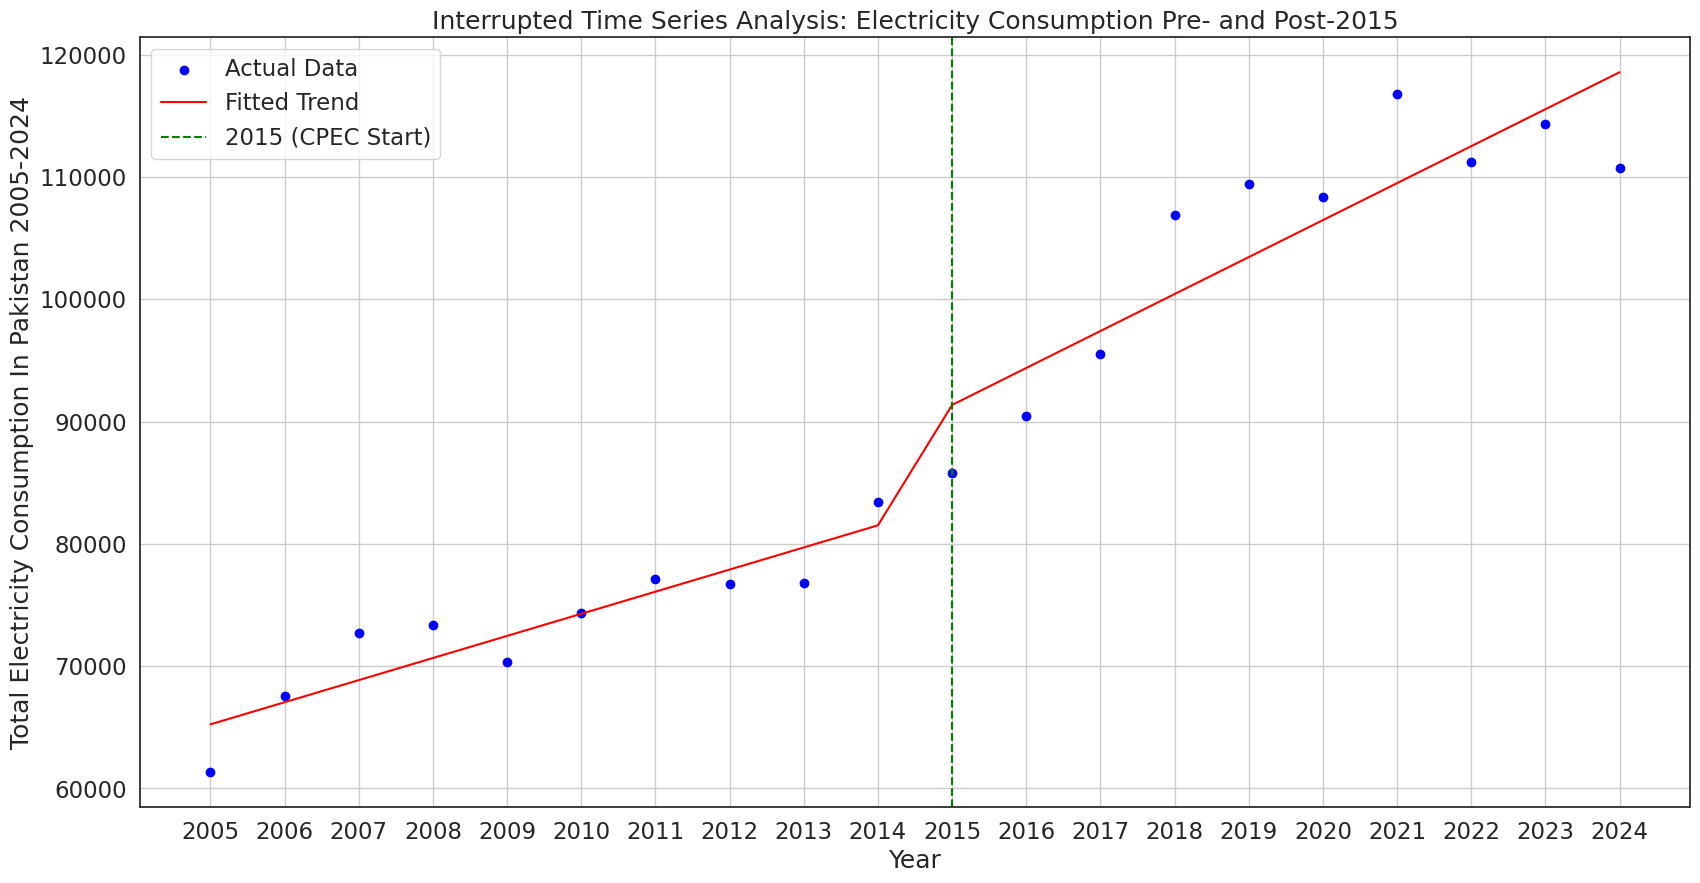

In [27]:



import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Define the dependent variable (Electricity Consumption) and independent variables
X = df[['Time', 'Post_2015', 'Post_2015_Time']]  # Independent variables
X = sm.add_constant(X)  # Add an intercept term
y = df['Total Electricity Consumption ']  # Dependent variable

# Fit an OLS regression model
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())

# Plot the data and fitted trends
plt.figure(figsize=(20, 10))
plt.scatter(df['Year'], df['Total Electricity Consumption '], color='blue', label='Actual Data')
plt.plot(df['Year'], model.predict(X), color='red', label='Fitted Trend')

# Add vertical line to mark 2015
plt.axvline(x=2015, color='green', linestyle='--', label='2015 (CPEC Start)')
plt.xlabel('Year')
plt.ylabel('Total Electricity Consumption In Pakistan 2005-2024')
plt.title('Interrupted Time Series Analysis: Electricity Consumption Pre- and Post-2015')
plt.legend()
plt.grid()
plt.xticks(np.arange(df['Year'].min(), df['Year'].max() + 1, 1))

plt.show()

In [28]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving energy efficiency.xlsx to energy efficiency.xlsx


In [30]:
#Name of uploaded file
file_name = 'energy efficiency.xlsx'

#Read data from the two sheets
sheet1_df = pd.read_excel(file_name, sheet_name='Energy Efficiency')

In [31]:
data = sheet1_df
data

,Year,Energy intensity level of primary energy (MJ/$2017 PPP GDP)
0,2010,4.78
1,2011,4.44
2,2012,4.35
3,2013,4.26
4,2014,4.26
5,2015,4.18
6,2016,4.16
7,2017,4.17
8,2018,4.18
9,2019,3.94


In [35]:
# Split the data into pre- and post-2015 groups for energy efficiency
pre_2015 = data[data['Year'] < 2015]['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']
post_2015 = data[data['Year'] >= 2015]['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

In [36]:
# Create pre/post-2015 dummy variables
data['Post_2015'] = (data['Year'] >= 2015).astype(int)

# Create a time variable relative to 2015
# Negative values for years before 2015, 0 for 2015, positive values after 2015
data['Time'] = data['Year'] - 2015

# Interaction term: Post_2015 * Time (to capture change in slope post-2015)
data['Post_2015_Time'] = data['Post_2015'] * data['Time']

# Inspect the transformed data
print(data.head())

   Year  Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0  2010                                               4.78             
1  2011                                               4.44             
2  2012                                               4.35             
3  2013                                               4.26             
4  2014                                               4.26             

   Post_2015  Time  Post_2015_Time  
0          0    -5               0  
1          0    -4               0  
2          0    -3               0  
3          0    -2               0  
4          0    -1               0  


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


                                                 OLS Regression Results                                                
Dep. Variable:     Energy intensity level of primary energy (MJ/$2017 PPP GDP)   R-squared:                       0.893
Model:                                                                     OLS   Adj. R-squared:                  0.852
Method:                                                          Least Squares   F-statistic:                     22.15
Date:                                                         Tue, 07 Jan 2025   Prob (F-statistic):           0.000314
Time:                                                                 09:43:39   Log-Likelihood:                 14.529
No. Observations:                                                           12   AIC:                            -21.06
Df Residuals:                                                                8   BIC:                            -19.12
Df Model:                               

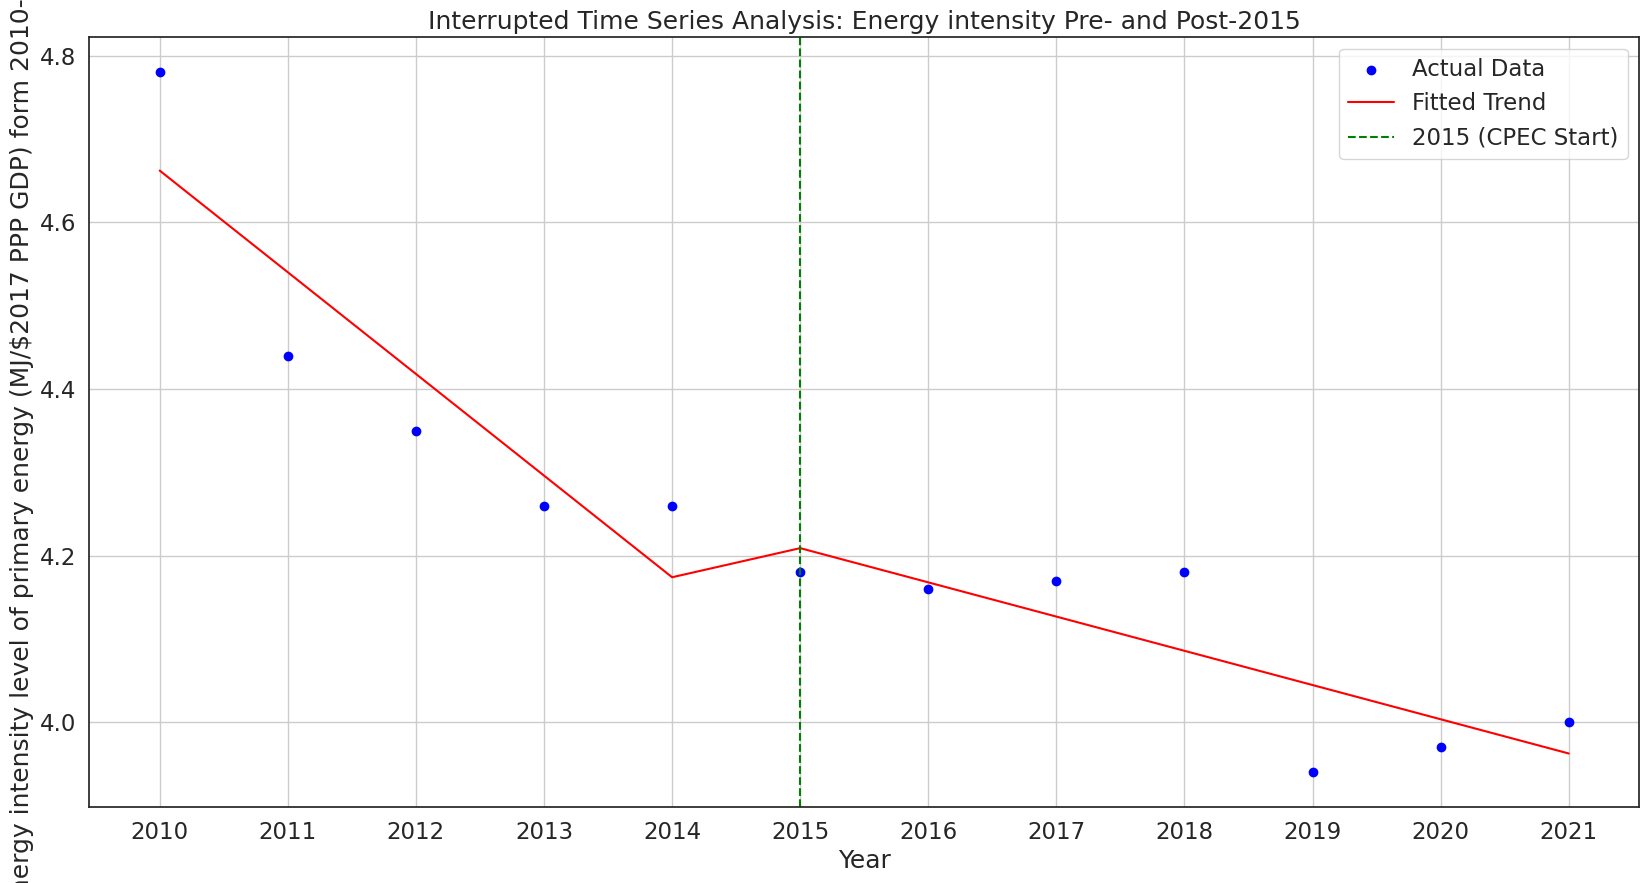

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Define the dependent variable (Electricity Consumption) and independent variables
X = data[['Time', 'Post_2015', 'Post_2015_Time']]  # Independent variables
X = sm.add_constant(X)  # Add an intercept term
y = data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']  # Dependent variable

# Fit an OLS regression model
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())

# Plot the data and fitted trends
plt.figure(figsize=(20, 10))
plt.scatter(data['Year'], data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'], color='blue', label='Actual Data')
plt.plot(data['Year'], model.predict(X), color='red', label='Fitted Trend')

# Add vertical line to mark 2015
plt.axvline(x=2015, color='green', linestyle='--', label='2015 (CPEC Start)')
plt.xlabel('Year')
plt.ylabel('Energy intensity level of primary energy (MJ/$2017 PPP GDP) form 2010-2021')
plt.title('Interrupted Time Series Analysis: Energy intensity Pre- and Post-2015')
plt.legend()
plt.grid()
plt.xticks(np.arange(data['Year'].min(), data['Year'].max() + 1, 1))

plt.show()